전이학습을 이용하여 본인만의 분류학습 모델을 제작 및 파인 튜닝 과정을 pt로 정리하여 제출

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip -qq "/content/drive/MyDrive/sesac/fashion_mini.zip"

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

PATH = '/content/fashion_mini'

In [ ]:
# batchsize, image size 지정
BATCH_SIZE = 32
IMG_SIZE = (160, 160)

train_dataset = tf.keras.utils.image_dataset_from_directory(PATH,
                                                            validation_split=0.2,  # 전체데이터의 20%를 val로
                                                            subset="training",     # 80%의 이름은 training로
                                                            seed=123,              # 같은 자료로 나눌수 있게 seed값 고정
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)

validation_dataset = tf.keras.utils.image_dataset_from_directory(PATH,
                                                                validation_split=0.2,  # 전체데이터의 20%를 val로
                                                                subset="validation",     # 80%의 이름은 validation 로
                                                                seed=123,              # 같은 자료로 나눌수 있게 seed값 고정
                                                                shuffle=True,
                                                                batch_size=BATCH_SIZE,
                                                                image_size=IMG_SIZE)

Found 1530 files belonging to 3 classes.
Using 1224 files for training.
Found 1530 files belonging to 3 classes.
Using 306 files for validation.


In [ ]:
################################
### class_names는 이 코드에서는 사용할수 있지만 혹시 모델을 저장하고 새 파일에서 사용할때는
### 사용할수 없는 변수명임으로 필요하다면 class_name만 별도의 txt나 json파일로 저장해야함.
### class_name가 많다면
#####################################
class_names = train_dataset.class_names
class_names

['red_dress', 'red_shoes', 'white_shorts']

In [ ]:
#########################################################
### 추가코드  (take에 대한 이해를 돕기위해)
### Found 1530 files belonging to 3 classes.
###  Using 1224 files for training. ====> 임으로
###  1224개 의 train 자료를 32개씩 배치했음으로   38.25 임으로 총 39개의 세트가 생김
###                          32개*38개take=1216 개 데이터셋  + 마지막 39번째 take에는 8개의 데이터셋만 있음
### take(번호) 는 그 번호까지 값을 출력하는 기능이며 tensor은 텐서라는 특수한 타입으로 작업되어 있음. 파이토치 할때 다시 강의함.
#######################################################

for bun, (images, labels) in enumerate(train_dataset.take(40)):
  print(bun+1,'take:   ', labels)

1 take:    tf.Tensor([1 1 1 0 0 1 1 0 1 0 2 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0], shape=(32,), dtype=int32)
2 take:    tf.Tensor([1 0 2 0 1 1 1 1 0 1 2 0 0 0 0 1 1 0 0 0 0 1 1 0 1 1 0 0 1 1 1 1], shape=(32,), dtype=int32)
3 take:    tf.Tensor([0 2 1 0 0 1 0 0 0 0 1 0 1 1 0 1 1 2 0 1 0 1 0 0 0 1 0 1 2 1 1 1], shape=(32,), dtype=int32)
4 take:    tf.Tensor([1 0 0 0 1 0 0 0 0 1 1 1 1 0 1 2 1 1 1 0 0 0 1 0 1 0 1 1 1 0 1 0], shape=(32,), dtype=int32)
5 take:    tf.Tensor([1 0 1 1 0 1 1 1 2 0 1 1 0 0 1 0 0 0 1 1 0 0 1 1 1 1 0 1 1 2 1 0], shape=(32,), dtype=int32)
6 take:    tf.Tensor([1 0 2 2 0 1 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 2 0 0], shape=(32,), dtype=int32)
7 take:    tf.Tensor([1 0 0 0 1 0 1 1 1 1 0 0 0 2 1 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0], shape=(32,), dtype=int32)
8 take:    tf.Tensor([0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0], shape=(32,), dtype=int32)
9 take:    tf.Tensor([0 0 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1], 

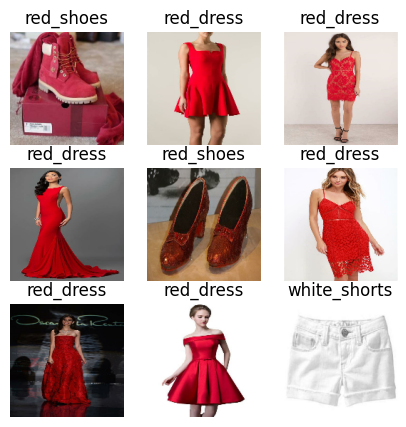

In [ ]:
plt.figure(figsize=(5, 5))

for images, labels in train_dataset.take(1):
  for i in range(9):  # 9개의 이미지 출력
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))  # 이미지 표현을 위해 numpy 배열 dtype을 uint8로 지정
    plt.title(class_names[labels[i]])  # images에 해당하는 레이블 출력
    plt.axis("off")

In [ ]:
##########################
## test dataset이 없었기 때문에 validation dataset에서 일정부분 가져와서 사용함
### 아래코드는 복사하여서
### gpt에게 '다음코드 해석해줘'
### 붙여넣기
#########################

val_batches = tf.data.experimental.cardinality(validation_dataset)  # validation_dataset 크기를 계산
test_dataset = validation_dataset.take(val_batches // 5)   # validation_dataset의 크기의 1/5에 해당하는 image, label 2개(10//5) 가져오기
validation_dataset = validation_dataset.skip(val_batches // 5)  #


In [ ]:
val_batches.numpy()  # len(validation_data) / BATCH_SIZE = 306 / 32 = 9.56 = 10

10

In [ ]:
for images, labels in test_dataset:
  print(labels)

tf.Tensor([1 0 1 1 0 1 1 0 1 1 0 0 2 0 1 1 0 1 1 1 0 0 1 2 0 0 0 0 0 0 0 2], shape=(32,), dtype=int32)
tf.Tensor([0 0 1 0 0 0 2 0 1 1 0 0 1 1 0 1 1 2 1 1 2 1 0 0 0 1 1 0 2 0 0 1], shape=(32,), dtype=int32)


In [ ]:
#####################
## 속도높이기
## gpt에게 코드해석 및  캐시메모리, 버퍼 개념 알기
###########################
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

In [ ]:
###############################################################
## 데이터 증강, 데이터증강은 이 외에도 다양한 기법을 적용할수 있으며
## 데이터 과적합시 증강에 대한 이슈가 커짐
## 지금은 'https://www.cubox.ai/board/blog/board_view.php?&page=1&num=625' 이 사이트만 대략 살펴보며
## 추후 구글검색 '데이터 증강 최신 논문' 으로 계속 살펴봐야함.
################################################################
# 데이터 증강 기법으로 좌우 반전, 회전, 명암 조절을 적용
##
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
  tf.keras.layers.RandomContrast(0.3)
])